In [1]:
import os
import random
from datetime import datetime 

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from PIL import Image

from sklearn.metrics import classification_report, r2_score
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

from classification_tree import build_classification_tree
from regression_tree import build_regression_tree

from plot import visualize_tree

In [2]:
%reload_ext autoreload
%autoreload 2

# Задача классификации

## Датасет без пропусков

In [3]:
dataset = pd.read_csv("stars.csv")
dataset.head()

,Temperature (K),Luminosity(L/Lo),Radius(R/Ro),Absolute magnitude(Mv),Star type,Star color,Spectral Class
0,3068,0.002400,0.1700,16.12,0,Red,M
1,3042,0.000500,0.1542,16.60,0,Red,M
2,2600,0.000300,0.1020,18.70,0,Red,M
3,2800,0.000200,0.1600,16.65,0,Red,M
4,1939,0.000138,0.1030,20.06,0,Red,M


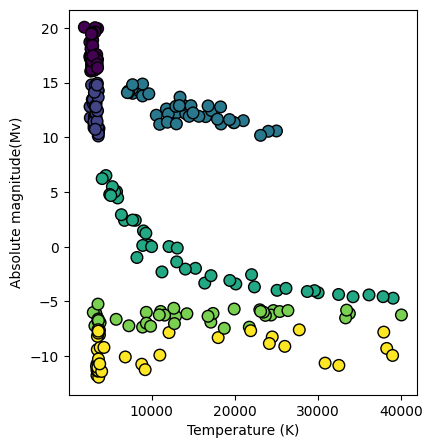

In [4]:
plt.scatter(dataset['Temperature (K)'], dataset["Absolute magnitude(Mv)"], c=dataset["Star type"], s=70, edgecolors='k')
plt.gcf().set_size_inches((4.5, 5))

plt.ylabel("Absolute magnitude(Mv)")
plt.xlabel("Temperature (K)")
plt.savefig("assets/classification_dataset_sample.png", bbox_inches='tight')

In [5]:
y = dataset["Star type"]
X = dataset.drop(["Star type"], axis=1)

le = LabelEncoder()

X["Spectral Class"] = le.fit_transform(X["Spectral Class"])
X["Star color"] = le.fit_transform(X["Star color"])

X = X.to_numpy()
y = y.to_numpy()

In [6]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [7]:
MAX_DEPTH = 4
entropy_tree = build_classification_tree(X_train, y_train, criterion="entropy", max_depth=MAX_DEPTH)
donskoy_tree = build_classification_tree(X_train, y_train, criterion="donskoy", max_depth=MAX_DEPTH)


Created node with feature: 1, beta=0.056
Сurrent_depth=0, node entropy: 2.5803242527214763
Classes in different sets: 0=[0 1 2], 1=[3 4 5]

Go Left
Created node with feature: 3, beta=14.79
Сurrent_depth=1, node entropy: 1.5817155311032134
Classes in different sets: 0=[1 2], 1=[0]

Go Left
Created node with feature: 0, beta=3628.0
Сurrent_depth=2, node entropy: 0.999806132804711
Classes in different sets: 0=[1], 1=[2]

Go Left
Created final node for lbl=1, classes=[1]

Go Right
Created final node for lbl=2, classes=[2]

Go Right
Created final node for lbl=0, classes=[0]

Go Right
Created node with feature: 2, beta=98.0
Сurrent_depth=1, node entropy: 1.57893297433974
Classes in different sets: 0=[3 4], 1=[5]

Go Left
Created node with feature: 2, beta=10.6
Сurrent_depth=2, node entropy: 0.9916178297881031
Classes in different sets: 0=[3], 1=[4]

Go Left
Created final node for lbl=3, classes=[3]

Go Right
Created final node for lbl=4, classes=[4]

Go Right
Created final node for lbl=5, cl

In [8]:
tree_sklearn = DecisionTreeClassifier(criterion="entropy", max_depth=MAX_DEPTH, random_state=10)
tree_sklearn.fit(X_train, y_train)


DecisionTreeClassifier(criterion='entropy', max_depth=4, random_state=10)

In [9]:
tic = datetime.now()
y_ent = []
for i in range(len(y_test)):
    y_ent.append(entropy_tree.predict(X_test[i]))
y_ent = np.array(y_ent)
y_ent = np.argmax(y_ent, axis=1)

tac = datetime.now()
y_don = []
for i in range(len(y_test)):
    y_don.append(donskoy_tree.predict(X_test[i]))
y_don = np.array(y_don)
y_don = np.argmax(y_don, axis=1)
toc = datetime.now()

y_skl = tree_sklearn.predict(X_test)
tuc = datetime.now()

In [10]:
print(f"Custom Implementation with Entropy Criterion: {(tac-tic).microseconds} mcs")
print(classification_report(y_test, y_ent))

print(f"Custom Implementation with Donskoy Criterion: {(toc-tac).microseconds} mcs")
print(classification_report(y_test, y_don))

print(f"Sklearn Implementation: {(tuc-toc).microseconds} mcs")
print(classification_report(y_test, y_skl))

Custom Implementation with Entropy Criterion: 0 mcs
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.78      0.88         9
           2       0.89      0.80      0.84        10
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         4
           5       1.00      1.00      1.00         9

    accuracy                           0.92        48
   macro avg       0.92      0.93      0.91        48
weighted avg       0.94      0.92      0.92        48

Custom Implementation with Donskoy Criterion: 0 mcs
              precision    recall  f1-score   support

           0       0.62      1.00      0.77         5
           1       1.00      0.78      0.88         9
           2       0.89      0.80      0.84        10
           3       1.00      1.00      1.00        11
           4       1.00      1.00      1.00         4
           5       1.00     

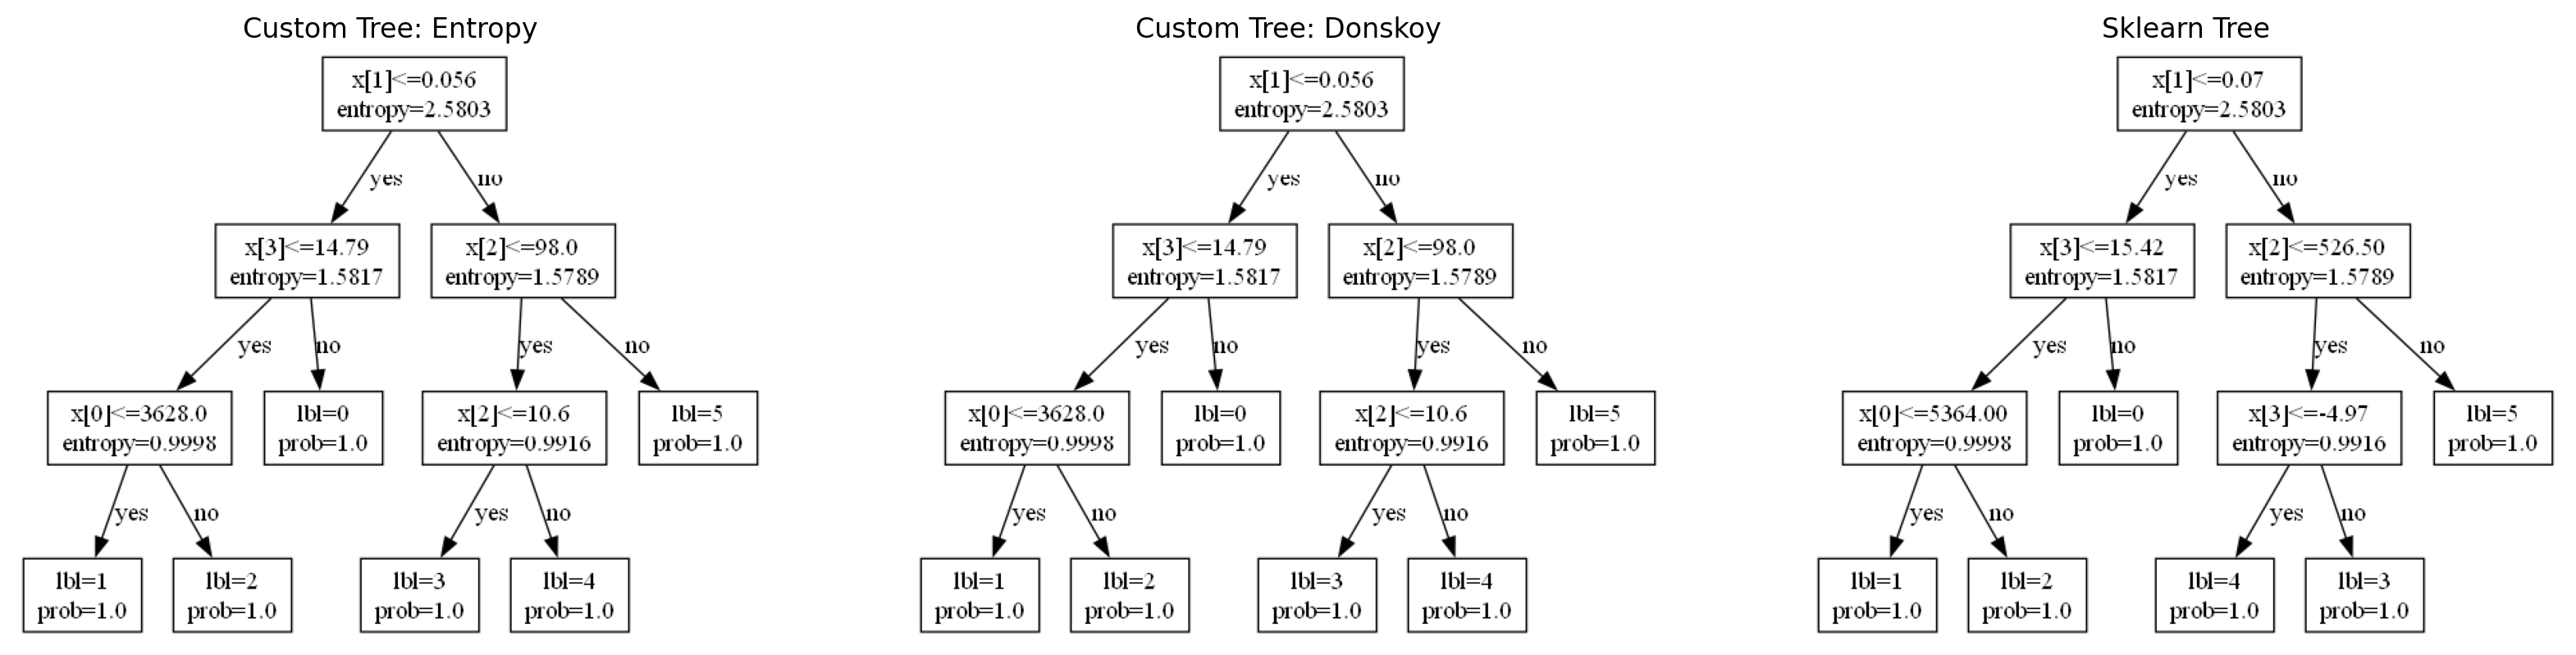

In [11]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=200)

visualize_tree(entropy_tree, path="assets/classification_custom_entropy.png", tree_type="classification", tree_source="custom")
axes[0].imshow(Image.open("assets/classification_custom_entropy.png"))
axes[0].axis("off")
axes[0].set_title('Custom Tree: Entropy')

visualize_tree(donskoy_tree, path="assets/classification_custom_donskoy.png", tree_type="classification", tree_source="custom")
axes[1].imshow(Image.open("assets/classification_custom_donskoy.png"))
axes[1].axis("off")
axes[1].set_title('Custom Tree: Donskoy')

visualize_tree(tree_sklearn.tree_, path="assets/classification_sklearn.png", tree_type="classification", tree_source="sklearn")
axes[2].imshow(Image.open("assets/classification_sklearn.png"))
axes[2].axis("off")
axes[2].set_title('Sklearn Tree')

os.remove("assets/classification_custom_entropy.png")
os.remove("assets/classification_custom_donskoy.png")
os.remove("assets/classification_sklearn.png")

plt.savefig("assets/classification.png", bbox_inches="tight")

## Датасет с пропусками

In [12]:
dataset = pd.read_csv("stars.csv")

y = dataset["Star type"]
X = dataset.drop(["Star type"], axis=1)

le = LabelEncoder()

X["Spectral Class"] = le.fit_transform(X["Spectral Class"])
X["Star color"] = le.fit_transform(X["Star color"])

ix = [(row, col) for row in range(X.shape[0]) for col in range(X.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    X.iat[row, col] = np.nan

X = X.to_numpy()
y = y.to_numpy()

In [13]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [14]:
MAX_DEPTH = 7
entropy_tree = build_classification_tree(X_train, y_train, criterion="entropy", max_depth=MAX_DEPTH)
donskoy_tree = build_classification_tree(X_train, y_train, criterion="donskoy", max_depth=MAX_DEPTH)


Created node with feature: 2, beta=0.73
Сurrent_depth=0, node entropy: 2.5804124881030517
Classes in different sets: 0=[0 1 2], 1=[3 4 5]

Go Left
Created node with feature: 3, beta=14.94
Сurrent_depth=1, node entropy: 1.5634600644695429
Classes in different sets: 0=[1 2], 1=[0]

Go Left
Created node with feature: 0, beta=3628.0
Сurrent_depth=2, node entropy: 0.9788698505067783
Classes in different sets: 0=[1], 1=[2]

Go Left
Created final node for lbl=1, classes=[1]

Go Right
Created final node for lbl=2, classes=[2]

Go Right
Created final node for lbl=0, classes=[0]

Go Right
Created node with feature: 2, beta=7.2
Сurrent_depth=1, node entropy: 1.5710587975070207
Classes in different sets: 0=[3], 1=[4 5]

Go Left
Created final node for lbl=3, classes=[3]

Go Right
Created node with feature: 3, beta=-7.59
Сurrent_depth=2, node entropy: 0.9790981671667149
Classes in different sets: 0=[5], 1=[4]

Go Left
Created final node for lbl=5, classes=[5]

Go Right
Created final node for lbl=4, 

In [15]:
tree_sklearn = DecisionTreeClassifier(criterion="entropy", max_depth=MAX_DEPTH, random_state=10)
tree_sklearn.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy', max_depth=7, random_state=10)

In [16]:
tic = datetime.now()
y_ent = []
for i in range(len(y_test)):
    y_ent.append(entropy_tree.predict(X_test[i]))
y_ent = np.array(y_ent)
y_ent = np.argmax(y_ent, axis=1)

tac = datetime.now()
y_don = []
for i in range(len(y_test)):
    y_don.append(donskoy_tree.predict(X_test[i]))
y_don = np.array(y_don)
y_don = np.argmax(y_don, axis=1)
toc = datetime.now()

y_skl = tree_sklearn.predict(X_test)
tuc = datetime.now()

In [17]:
print(f"Custom Implementation with Entropy Criterion: {(tac-tic).microseconds} mcs")
print(classification_report(y_test, y_ent))

print(f"Custom Implementation with Donskoy Criterion: {(toc-tac).microseconds} mcs")
print(classification_report(y_test, y_don))

print(f"Sklearn Implementation: {(tuc-toc).microseconds} mcs")
print(classification_report(y_test, y_skl))

Custom Implementation with Entropy Criterion: 1000 mcs
              precision    recall  f1-score   support

           0       1.00      1.00      1.00         6
           1       1.00      0.73      0.84        11
           2       0.54      1.00      0.70         7
           3       1.00      0.50      0.67         6
           4       0.67      1.00      0.80         6
           5       1.00      0.75      0.86        12

    accuracy                           0.81        48
   macro avg       0.87      0.83      0.81        48
weighted avg       0.89      0.81      0.82        48

Custom Implementation with Donskoy Criterion: 0 mcs
              precision    recall  f1-score   support

           0       0.75      1.00      0.86         6
           1       0.75      0.55      0.63        11
           2       1.00      0.71      0.83         7
           3       0.60      1.00      0.75         6
           4       0.75      1.00      0.86         6
           5       1.00  

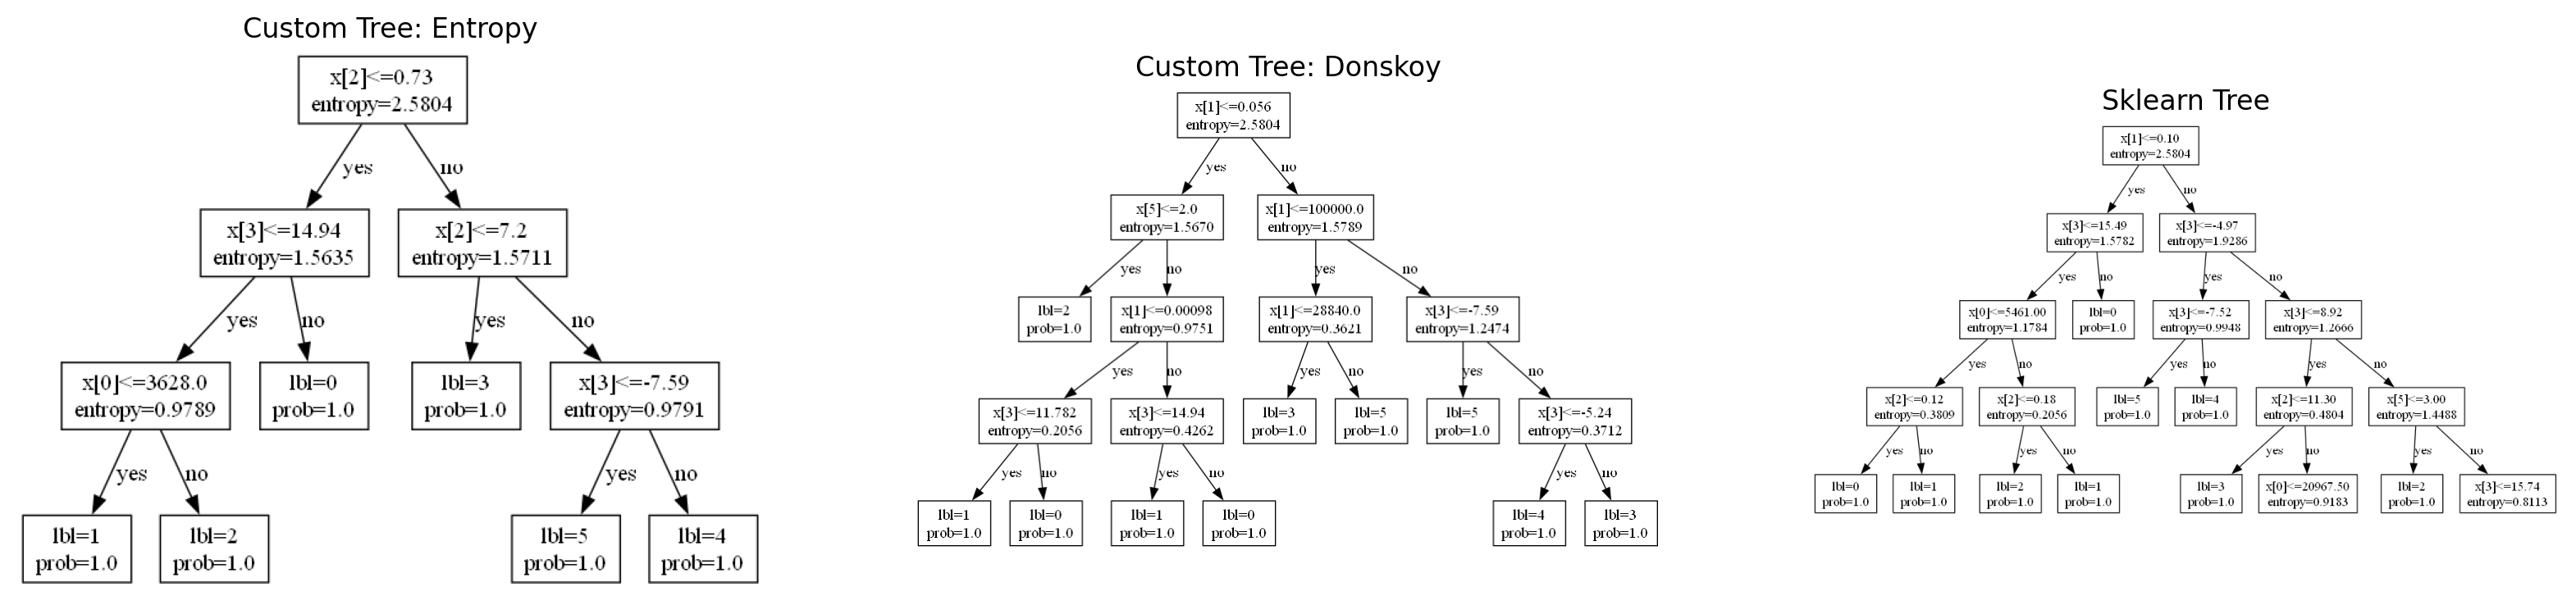

In [18]:
fig, axes = plt.subplots(1, 3, figsize=(20, 5), dpi=200)

visualize_tree(entropy_tree, path="assets/classification_missed_vals_custom_entropy.png", tree_type="classification", tree_source="custom")
axes[0].imshow(Image.open("assets/classification_missed_vals_custom_entropy.png"))
axes[0].axis("off")
axes[0].set_title('Custom Tree: Entropy')

visualize_tree(donskoy_tree, path="assets/classification_missed_vals_custom_donskoy.png", tree_type="classification", tree_source="custom")
axes[1].imshow(Image.open("assets/classification_missed_vals_custom_donskoy.png"))
axes[1].axis("off")
axes[1].set_title('Custom Tree: Donskoy')

visualize_tree(tree_sklearn.tree_, path="assets/classification_missed_vals_sklearn.png", tree_type="classification", tree_source="sklearn")
axes[2].imshow(Image.open("assets/classification_missed_vals_sklearn.png"))
axes[2].axis("off")
axes[2].set_title('Sklearn Tree')

os.remove("assets/classification_missed_vals_custom_entropy.png")
os.remove("assets/classification_missed_vals_custom_donskoy.png")
os.remove("assets/classification_missed_vals_sklearn.png")

plt.savefig("assets/classification_missed_vals.png", bbox_inches="tight")

# Задача регрессии

## Датасет без пропусков

In [19]:
data = pd.read_csv("auto-mpg.csv")
# mpg - расход топлива (miles per gallon)

data = data.drop(["car name", "origin"], axis=1)

data["horsepower"] = data["horsepower"].replace({"?": np.nan}).astype(np.float32)
mean_hp = np.nanmean(data["horsepower"])
data["horsepower"] = data["horsepower"].fillna(mean_hp).astype(np.uint16)

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130,3504,12.0,70
1,15.0,8,350.0,165,3693,11.5,70
2,18.0,8,318.0,150,3436,11.0,70
3,16.0,8,304.0,150,3433,12.0,70
4,17.0,8,302.0,140,3449,10.5,70


In [20]:
y = data[["mpg"]].to_numpy()
X = data.drop(["mpg"], axis=1).to_numpy()

X.shape, y.shape

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((318, 6), (80, 6))

In [21]:
MAX_DEPTH = 5

tree = build_regression_tree(X_train, y_train, max_depth=MAX_DEPTH)

Created node with feature: 1, beta=156.0
Сurrent_depth=0, node uncertainty: 63.543
Dispersion in different sets: 0=35.121, 1=16.625

Go Left
Created node with feature: 2, beta=70.0
Сurrent_depth=1, node uncertainty: 35.121
Dispersion in different sets: 0=26.878, 1=20.329

Go Left
Created node with feature: 5, beta=77.0
Сurrent_depth=2, node uncertainty: 26.878
Dispersion in different sets: 0=10.748, 1=19.375

Go Left
Created node with feature: 4, beta=19.5
Сurrent_depth=3, node uncertainty: 10.748
Dispersion in different sets: 0=6.263, 1=3.312

Go Left
Created final node for value=31.03

Go Right
Created final node for value=25.75

Go Right
Created node with feature: 2, beta=48.0
Сurrent_depth=3, node uncertainty: 19.375
Dispersion in different sets: 0=0.260, 1=16.280

Go Left
Created final node for value=43.60

Go Right
Created final node for value=35.86

Go Right
Created node with feature: 5, beta=78.0
Сurrent_depth=2, node uncertainty: 20.329
Dispersion in different sets: 0=10.592, 

In [22]:
tree_sklearn = DecisionTreeRegressor(criterion="squared_error", max_depth=MAX_DEPTH, random_state=10)
tree_sklearn.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=5, random_state=10)

In [23]:
tic = datetime.now()
y_res = []
for i in range(len(y_test)):
    y_res.append(tree.predict(X_test[i]))
y_res = np.array(y_res)
tac = datetime.now()
y_skl = tree_sklearn.predict(X_test)
toc = datetime.now()

print(f"Custom Implementation: {(tac-tic).microseconds} mcs, r2-score={r2_score(y_test, y_res):.4f}")
print(f"Sklearn Implementation: {(toc-tac).microseconds} mcs, r2-score={r2_score(y_test, y_skl):.4f}")

Custom Implementation: 0 mcs, r2-score=0.8466
Sklearn Implementation: 962 mcs, r2-score=0.7733


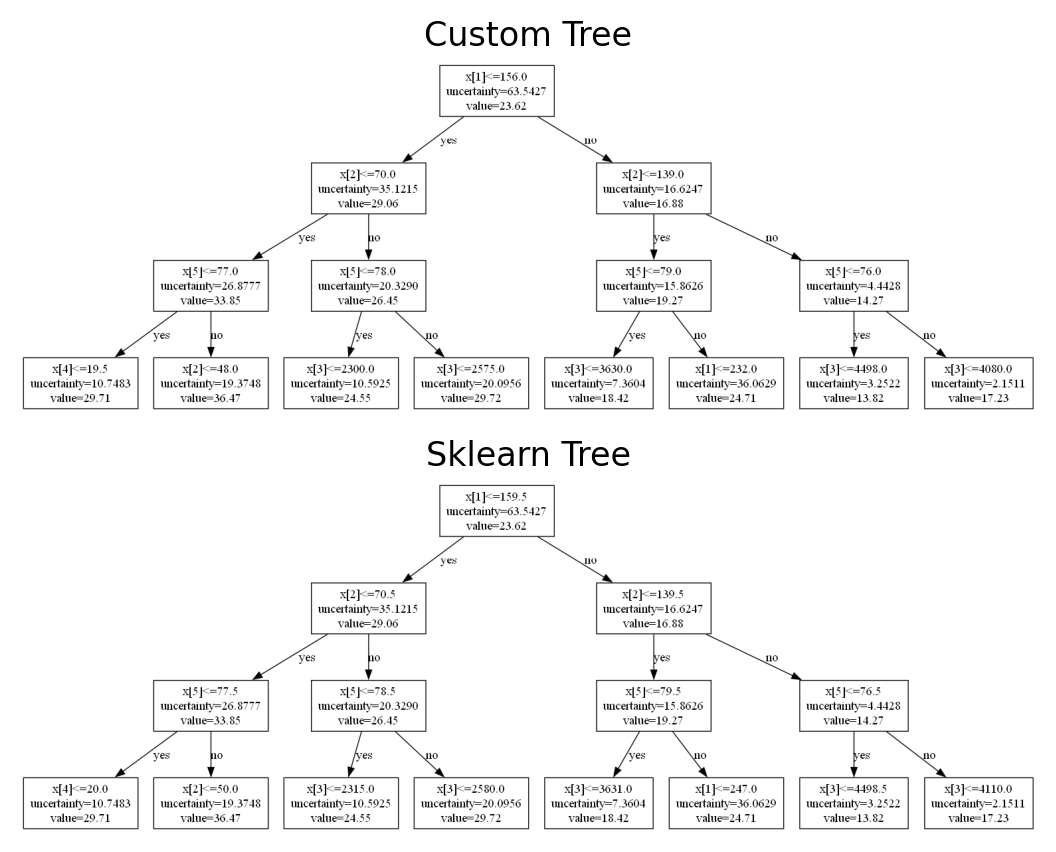

In [24]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5), dpi=200)

visualize_tree(tree, path="assets/regression_custom.png", tree_type="regression", tree_source="custom", max_depth=3)
axes[0].imshow(Image.open("assets/regression_custom.png"))
axes[0].axis("off")
axes[0].set_title('Custom Tree')

visualize_tree(tree_sklearn.tree_, path="assets/regression_sklearn.png", tree_type="regression", tree_source="sklearn", max_depth=3)
axes[1].imshow(Image.open("assets/regression_sklearn.png"))
axes[1].axis("off")
axes[1].set_title('Sklearn Tree')

os.remove("assets/regression_custom.png")
os.remove("assets/regression_sklearn.png")

plt.savefig("assets/regression.png", bbox_inches="tight")

## Датасет с пропусками

In [25]:
data = pd.read_csv("auto-mpg.csv")
# mpg - расход топлива (miles per gallon)

data = data.drop(["car name", "origin"], axis=1)
data["horsepower"] = data["horsepower"].replace({"?": np.nan}).astype(np.float32)

data.head()

,mpg,cylinders,displacement,horsepower,weight,acceleration,model year
0,18.0,8,307.0,130.0,3504,12.0,70
1,15.0,8,350.0,165.0,3693,11.5,70
2,18.0,8,318.0,150.0,3436,11.0,70
3,16.0,8,304.0,150.0,3433,12.0,70
4,17.0,8,302.0,140.0,3449,10.5,70


In [26]:
y = data[["mpg"]].to_numpy()
X = data.drop(["mpg"], axis=1)


ix = [(row, col) for row in range(X.shape[0]) for col in range(X.shape[1])]
for row, col in random.sample(ix, int(round(.1*len(ix)))):
    X.iat[row, col] = np.nan

X = X.to_numpy()
    
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train.shape, X_test.shape

((318, 6), (80, 6))

In [27]:
tree = build_regression_tree(X_train, y_train, max_depth=6)

Created node with feature: 1, beta=156.0
Сurrent_depth=0, node uncertainty: 62.307
Dispersion in different sets: 0=36.380, 1=11.292

Go Left
Created node with feature: 3, beta=2215.0
Сurrent_depth=1, node uncertainty: 36.380
Dispersion in different sets: 0=22.634, 1=24.175

Go Left
Created node with feature: 5, beta=77.0
Сurrent_depth=2, node uncertainty: 22.634
Dispersion in different sets: 0=10.437, 1=10.038

Go Left
Created node with feature: 3, beta=2075.0
Сurrent_depth=3, node uncertainty: 10.437
Dispersion in different sets: 0=6.327, 1=3.121

Go Left
Created node with feature: 4, beta=18.6
Сurrent_depth=4, node uncertainty: 6.327
Dispersion in different sets: 0=3.785, 1=2.000

Go Left
Created final node for value=32.32

Go Right
Created final node for value=27.00

Go Right
Created node with feature: 1, beta=98.0
Сurrent_depth=4, node uncertainty: 3.121
Dispersion in different sets: 0=2.786, 1=0.000

Go Left
Created final node for value=26.50

Go Right
Created final node for value

In [28]:
tree_sklearn = DecisionTreeRegressor(criterion="squared_error", max_depth=6, random_state=10)
tree_sklearn.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=6, random_state=10)

In [29]:
tic = datetime.now()
y_res = []
for i in range(len(y_test)):
    y_res.append(tree.predict(X_test[i]))
y_res = np.array(y_res)
tac = datetime.now()
y_skl = tree_sklearn.predict(X_test)
toc = datetime.now()

print(f"Custom Implementation: {(tac-tic).microseconds} mcs, r2-score={r2_score(y_test, y_res):.4f}")
print(f"Sklearn Implementation: {(toc-tac).microseconds} mcs, r2-score={r2_score(y_test, y_skl):.4f}")

Custom Implementation: 1007 mcs, r2-score=0.6595
Sklearn Implementation: 0 mcs, r2-score=0.6414


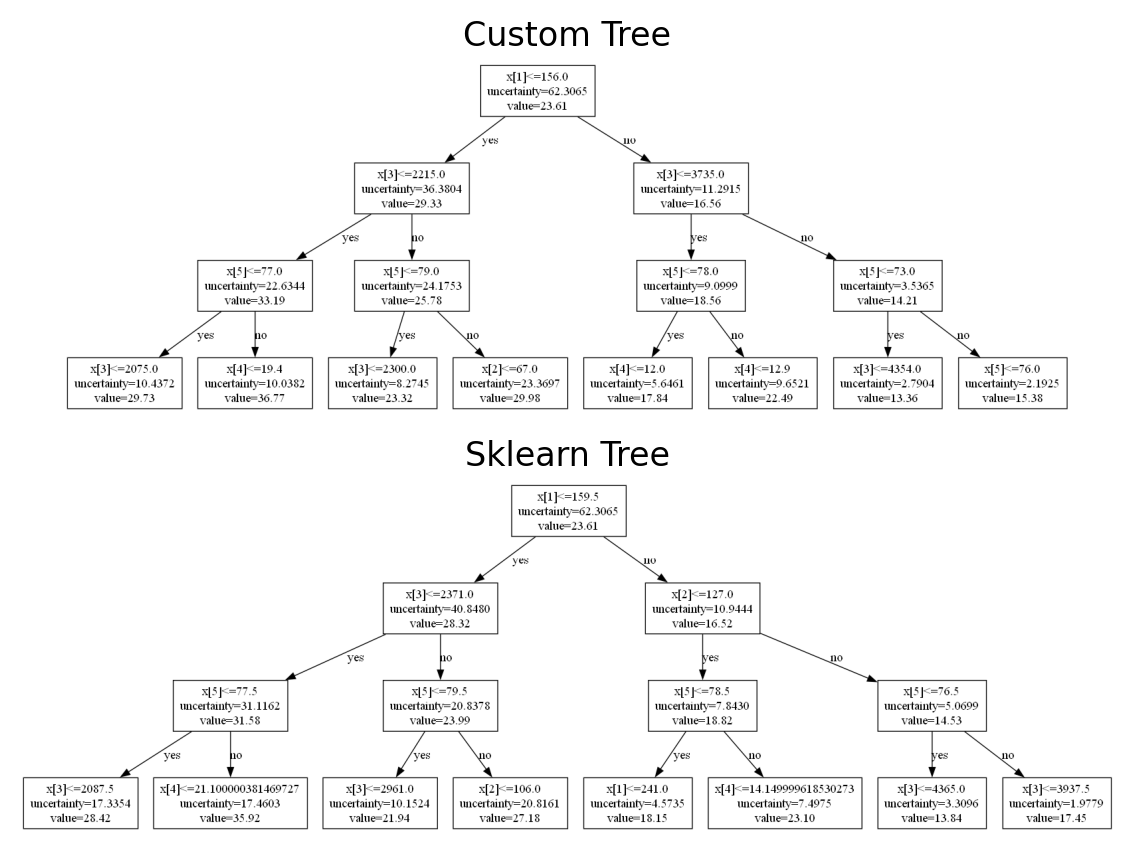

In [30]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5), dpi=200)

visualize_tree(tree, path="assets/regression_missed_vals_custom.png", tree_type="regression", tree_source="custom", max_depth=3)
axes[0].imshow(Image.open("assets/regression_missed_vals_custom.png"))
axes[0].axis("off")
axes[0].set_title('Custom Tree')

visualize_tree(tree_sklearn.tree_, path="assets/regression_missed_vals_sklearn.png", tree_type="regression", tree_source="sklearn", max_depth=3)
axes[1].imshow(Image.open("assets/regression_missed_vals_sklearn.png"))
axes[1].axis("off")
axes[1].set_title('Sklearn Tree')

os.remove("assets/regression_missed_vals_custom.png")
os.remove("assets/regression_missed_vals_sklearn.png")

plt.savefig("assets/regression_missed_vals.png", bbox_inches="tight")

# Редукция деревьев

## Классификация

In [31]:
from pruning import prune_classification_tree

In [32]:
dataset = pd.read_csv("stars.csv")

y = dataset["Star type"]
X = dataset.drop(["Star type"], axis=1)

le = LabelEncoder()

X["Spectral Class"] = le.fit_transform(X["Spectral Class"])
X["Star color"] = le.fit_transform(X["Star color"])

X = X.to_numpy()
y = y.to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_prune, y_train, y_prune = train_test_split(X_train, y_train, test_size=0.3)

print(X_train.shape, X_prune.shape, X_test.shape)

(134, 6) (58, 6) (48, 6)


In [33]:
tree = build_classification_tree(X_train, y_train, criterion="entropy")

Created node with feature: 1, beta=0.056
Сurrent_depth=0, node entropy: 2.5794011400606687
Classes in different sets: 0=[0 1 2], 1=[3 4 5]

Go Left
Created node with feature: 3, beta=14.94
Сurrent_depth=1, node entropy: 1.5788882613214157
Classes in different sets: 0=[1 2], 1=[0]

Go Left
Created node with feature: 0, beta=3607.0
Сurrent_depth=2, node entropy: 0.998363672593813
Classes in different sets: 0=[1], 1=[2]

Go Left
Created final node for lbl=1, classes=[1]

Go Right
Created final node for lbl=2, classes=[2]

Go Right
Created final node for lbl=0, classes=[0]

Go Right
Created node with feature: 2, beta=98.0
Сurrent_depth=1, node entropy: 1.5799140187999208
Classes in different sets: 0=[3 4], 1=[5]

Go Left
Created node with feature: 2, beta=10.6
Сurrent_depth=2, node entropy: 1.0
Classes in different sets: 0=[3], 1=[4]

Go Left
Created final node for lbl=3, classes=[3]

Go Right
Created final node for lbl=4, classes=[4]

Go Right
Created final node for lbl=5, classes=[5]


In [34]:
from copy import deepcopy

pruned_tree = deepcopy(tree)
pruned_tree = prune_classification_tree(pruned_tree, X_prune, y_prune)

(0.017241379310344827, 0.5, 0.5172413793103449, 0.7758620689655172) 0
(0.03333333333333333, 0.26666666666666666, 0.7666666666666667, 0.5666666666666667) 0
(0.043478260869565216, 0.5652173913043478, 0.43478260869565216, 0.43478260869565216) 0
(0.0, 0.21428571428571427, 0.7857142857142857, 0.5357142857142857) 0
(0.0, 0.4090909090909091, 0.5909090909090909, 0.4090909090909091) 0


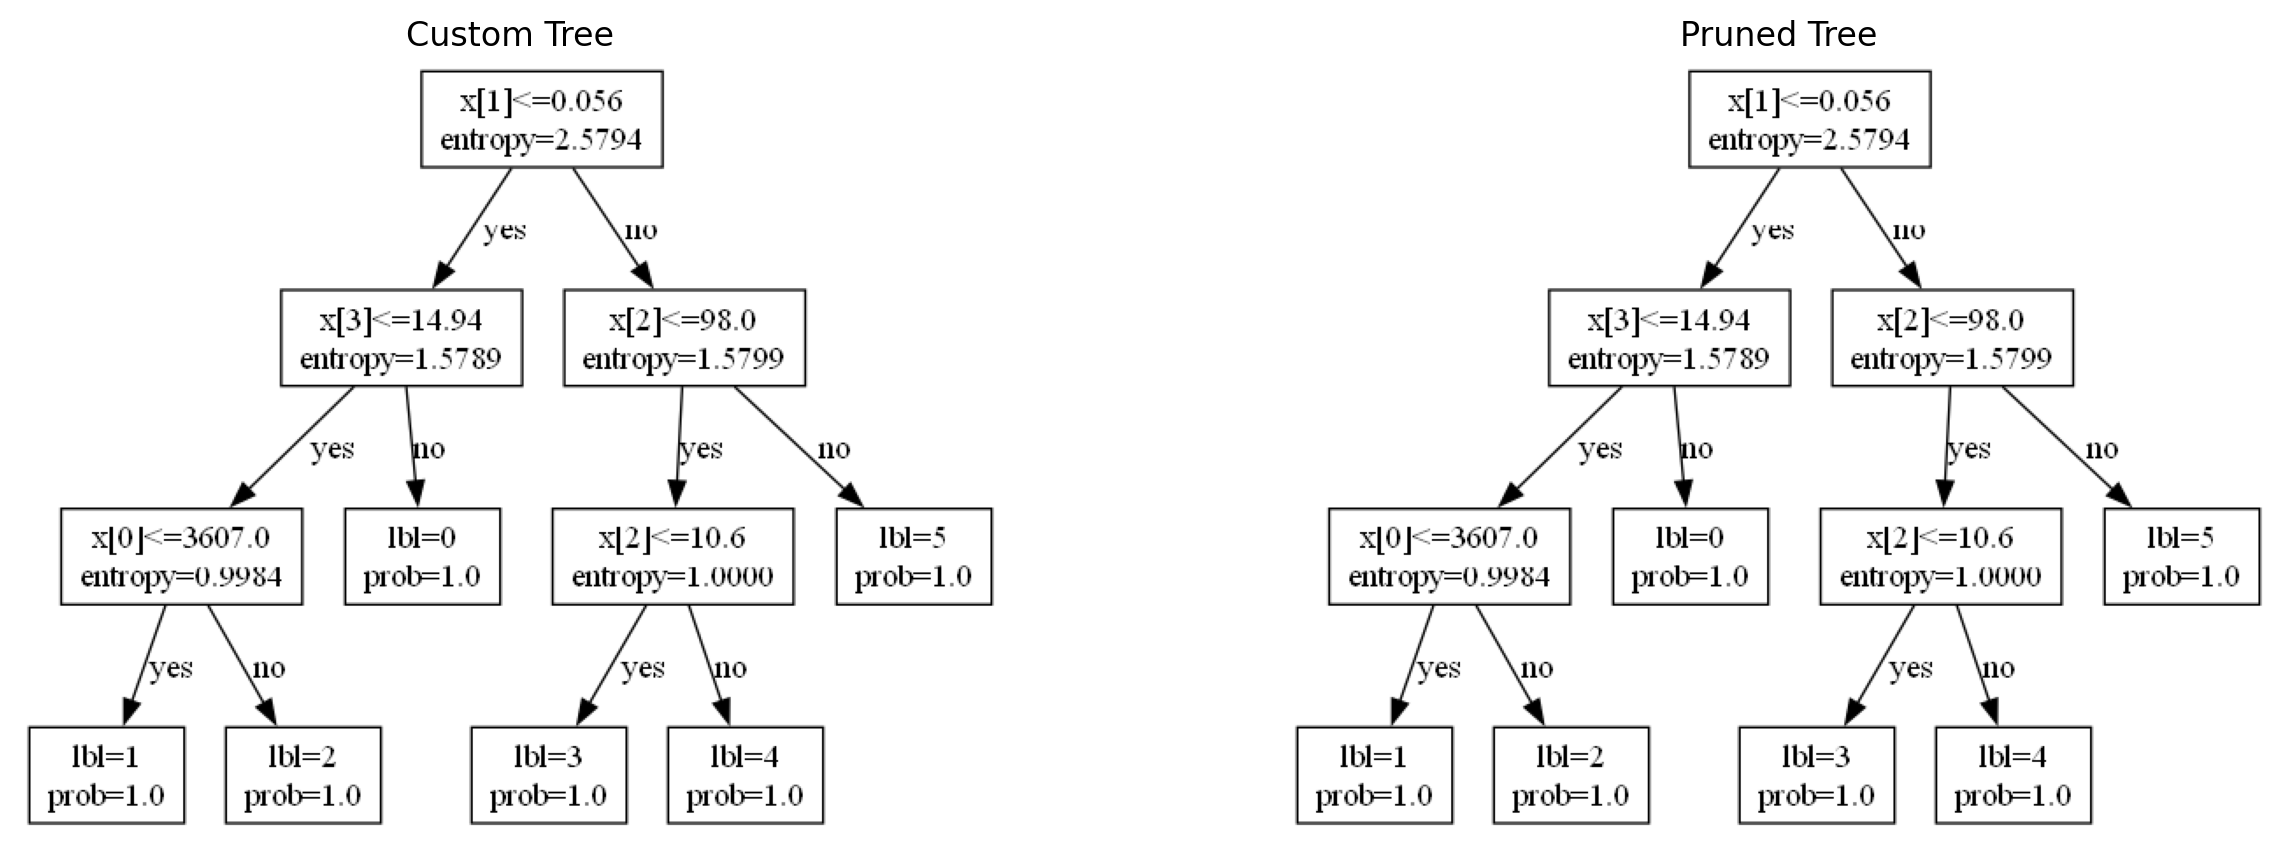

In [35]:
fig, axes = plt.subplots(1, 2, figsize=(15, 5), dpi=200)

visualize_tree(tree, path="assets/classification_before_prune.png", tree_type="classification", tree_source="custom")
axes[0].imshow(Image.open("assets/classification_before_prune.png"))
axes[0].axis("off")
axes[0].set_title('Custom Tree')

visualize_tree(pruned_tree, path="assets/classification_after_prune.png", tree_type="classification", tree_source="custom")
axes[1].imshow(Image.open("assets/classification_after_prune.png"))
axes[1].axis("off")
axes[1].set_title('Pruned Tree')

os.remove("assets/classification_before_prune.png")
os.remove("assets/classification_after_prune.png")

plt.savefig("assets/classification_pruning.png", bbox_inches="tight")

## Регрессия

In [36]:
from pruning import prune_regression_tree

In [37]:
data = pd.read_csv("auto-mpg.csv")
# mpg - расход топлива (miles per gallon)

data = data.drop(["car name", "origin"], axis=1)

data["horsepower"] = data["horsepower"].replace({"?": np.nan}).astype(np.float32)
mean_hp = np.nanmean(data["horsepower"])
data["horsepower"] = data["horsepower"].fillna(mean_hp).astype(np.uint16)

y = data[["mpg"]].to_numpy()
X = data.drop(["mpg"], axis=1).to_numpy()

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
X_train, X_prune, y_train, y_prune = train_test_split(X_train, y_train, test_size=0.5)

print(X_train.shape, X_prune.shape, X_test.shape)

(159, 6) (159, 6) (80, 6)


In [38]:
tree = build_regression_tree(X_train, y_train, max_depth=7)

Created node with feature: 3, beta=3035.0
Сurrent_depth=0, node uncertainty: 59.224
Dispersion in different sets: 0=32.318, 1=9.736

Go Left
Created node with feature: 3, beta=2219.0
Сurrent_depth=1, node uncertainty: 32.318
Dispersion in different sets: 0=20.637, 1=20.956

Go Left
Created node with feature: 5, beta=77.0
Сurrent_depth=2, node uncertainty: 20.637
Dispersion in different sets: 0=8.074, 1=9.438

Go Left
Created node with feature: 3, beta=2075.0
Сurrent_depth=3, node uncertainty: 8.074
Dispersion in different sets: 0=6.748, 1=3.265

Go Left
Created node with feature: 4, beta=18.5
Сurrent_depth=4, node uncertainty: 6.748
Dispersion in different sets: 0=3.354, 1=6.438

Go Left
Created node with feature: 4, beta=14.5
Сurrent_depth=5, node uncertainty: 3.354
Dispersion in different sets: 0=0.222, 1=1.802

Go Left
Created final node for value=29.33

Go Right
Created final node for value=32.56

Go Right
Created node with feature: 1, beta=79.0
Сurrent_depth=5, node uncertainty: 6

In [39]:
from copy import deepcopy

pruned_tree = deepcopy(tree)
pruned_tree = prune_regression_tree(pruned_tree, X_prune, y_prune)

(0.2362102956679622, 0.5728557611189397, 0.4870072161600379, 1.0) 0
(0.4729564481414608, 1.2912275858404463, 0.6018237204583836, 1.0) 0
(0.6131387400692371, 1.6306578878265126, 1.530405183028094, 1.0) 0
(1.462122201086619, 2.4240750065271723, 1.5137210473313194, 1.0) 3
(1.6201250199214907, 2.575489963298934, 4.551738951733997, 1.0) 3
(0.6446006454440306, 0.9401354961313383, 3.080014595963307, 1.0) 0
(0.7386037509485903, 1.1198357992471848, 1.418605071823632, 1.0) 0
(1.1339387868484505, 3.8973799126637543, 1.0013882796093203, 1.0) 3
(0.6356566820276499, 0.8963987028503159, 1.50681643625192, 1.0) 0
(0.9600000000000001, 1.2000000000000006, 1.2, 1.0) 0
(0.9083872458410354, 1.6247689463955644, 1.1747342883548988, 1.0) 0
(1.4150350913300036, 2.114632138437058, 1.6755795836280059, 1.0) 3
(0.6414985546944465, 1.1261015376823897, 0.7819414478455323, 1.0) 0
(1.2573722077934786, 7.349783862305765, 0.7755235922192383, 1.0) 2
(0.8305084745762711, 1.5762711864406773, 2.8220338983050848, 1.0) 0
(1.13

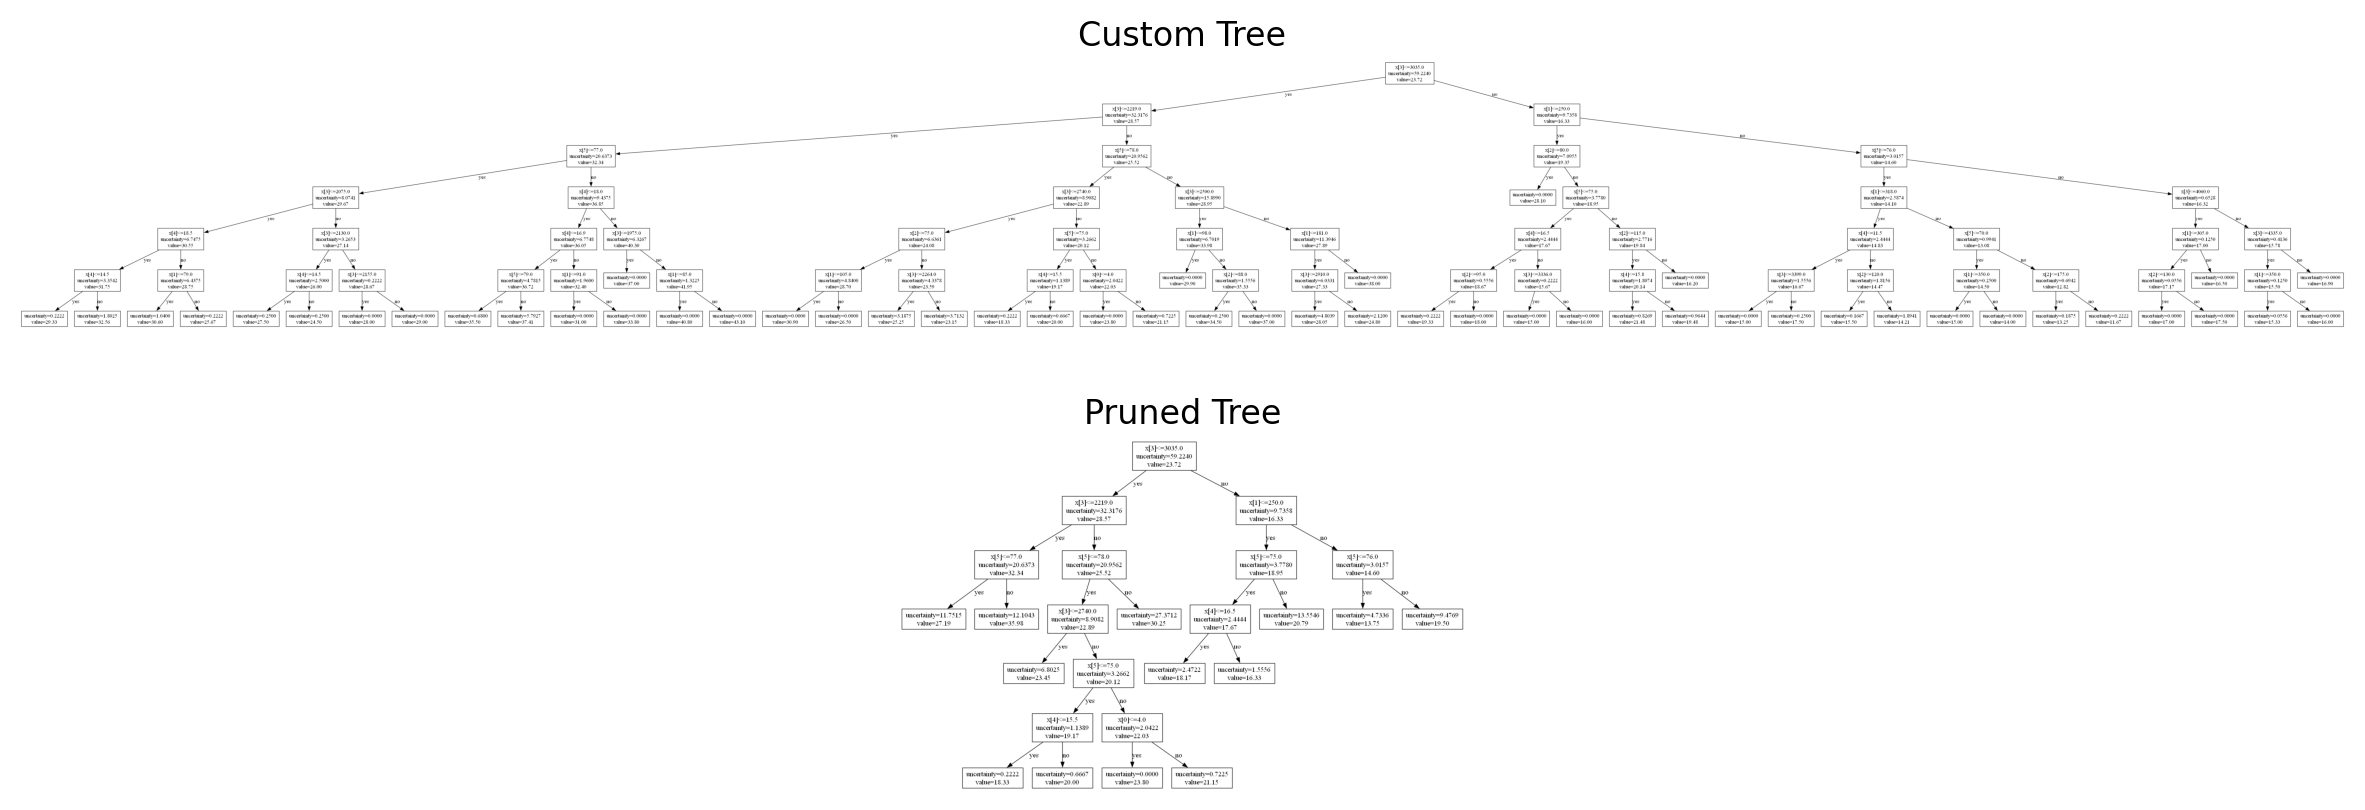

In [40]:
fig, axes = plt.subplots(2, 1, figsize=(15, 5), dpi=200)

visualize_tree(tree, path="assets/regression_before_prune.png", tree_type="regression", tree_source="custom", max_depth=7)
axes[0].imshow(Image.open("assets/regression_before_prune.png"))
axes[0].axis("off")
axes[0].set_title('Custom Tree')

visualize_tree(pruned_tree, path="assets/regression_after_prune.png", tree_type="regression", tree_source="custom", max_depth=7)
axes[1].imshow(Image.open("assets/regression_after_prune.png"))
axes[1].axis("off")
axes[1].set_title('Pruned Tree')

os.remove("assets/regression_before_prune.png")
os.remove("assets/regression_after_prune.png")

plt.savefig("assets/regression_pruning.png", bbox_inches="tight")

In [41]:
full_result = []
pruned_result = []
for x in X_test:
    x = x.reshape(-1, 1)
    full_result += [tree.predict(x)]
    pruned_result += [pruned_tree.predict(x)]

r2_score(y_test, full_result), r2_score(y_test, pruned_result)

(0.6706927274653305, 0.7620870433016214)